
## Mineria De Datos
## Introducción

En este proyecto, abordaremos el desafío de predecir si un Pokémon pertenece a la primera generación. Para lograrlo, comenzaremos con la limpieza y preparación de los datos, asegurándonos de que estén en la mejor forma posible para el análisis. A continuación, emplearemos diversos modelos de machine learning (ML) para determinar cuál es la mejor opción para esta tarea de clasificación. Evaluaremos la precisión y eficacia de cada modelo, con el objetivo de identificar el método más adecuado para predecir con exactitud la generación de un Pokémon.

**Lozda Sanchez Edgar Ivan**


## **Pok ́emon**

# Preparacion del Ambiente


## Importacion de librerias

In [ ]:
# Preparación de datos
import numpy as np
import pandas as pd

# Data Carga
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de Datos

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Practica 4/pokemon.csv")

In [ ]:
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


## EDA y limpieza de datos

In [ ]:
df.shape

(801, 41)

In [ ]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

### Clasificacion de variables

In [ ]:
ls_disc = ["abilities1","abilities2", 'name', 'japanese_name', "classfication",
           "is_legendary","type1", "type2","pokedex_number"]
ls_cont = ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'defense', 'experience_growth', 'height_m', 'hp','sp_attack',
       'sp_defense', 'speed','weight_kg','percentage_male']
target = "generation"

## Ajustes de la columna abilidades

In [ ]:
df2 = df
df2 = df2.loc[:, ['abilities']]
df2

,abilities
0,"['Overgrow', 'Chlorophyll']"
1,"['Overgrow', 'Chlorophyll']"
2,"['Overgrow', 'Chlorophyll']"
3,"['Blaze', 'Solar Power']"
4,"['Blaze', 'Solar Power']"
...,...
796,['Beast Boost']
797,['Beast Boost']
798,['Beast Boost']
799,['Prism Armor']


In [ ]:
df2['abilities1'] = df2['abilities'].str.strip('[]').str.split(',').str.get(0).str.strip().str.strip("'")
df2['abilities2'] = df2['abilities'].str.strip('[]').str.split(',').str.get(1).str.strip().str.strip("'")

In [ ]:
df2 = df2.drop('abilities', axis=1)
df = df.drop('abilities', axis=1)

In [ ]:
df = pd.concat([df2, df], axis=1)
df

,abilities1,abilities2,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Overgrow,Chlorophyll,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Overgrow,Chlorophyll,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Overgrow,Chlorophyll,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Blaze,Solar Power,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Blaze,Solar Power,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Beast Boost,NaN,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,Beast Boost,NaN,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,Beast Boost,NaN,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,Prism Armor,NaN,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


#### Remoción de variables con alto % de missings

In [ ]:
df[ls_disc+ls_cont].isna()

,abilities1,abilities2,name,japanese_name,classfication,is_legendary,type1,type2,pokedex_number,against_bug,...,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,percentage_male
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
797,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
798,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
799,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
missings = df[ls_disc+ls_cont].isna().mean()

In [ ]:
list(missings.items())

[('abilities1', 0.0),
 ('abilities2', 0.13607990012484394),
 ('name', 0.0),
 ('japanese_name', 0.0),
 ('classfication', 0.0),
 ('is_legendary', 0.0),
 ('type1', 0.0),
 ('type2', 0.4794007490636704),
 ('pokedex_number', 0.0),
 ('against_bug', 0.0),
 ('against_dark', 0.0),
 ('against_dragon', 0.0),
 ('against_electric', 0.0),
 ('against_fairy', 0.0),
 ('against_fight', 0.0),
 ('against_fire', 0.0),
 ('against_flying', 0.0),
 ('against_ghost', 0.0),
 ('against_grass', 0.0),
 ('against_ground', 0.0),
 ('against_ice', 0.0),
 ('against_normal', 0.0),
 ('against_poison', 0.0),
 ('against_psychic', 0.0),
 ('against_rock', 0.0),
 ('against_steel', 0.0),
 ('against_water', 0.0),
 ('attack', 0.0),
 ('base_egg_steps', 0.0),
 ('base_happiness', 0.0),
 ('base_total', 0.0),
 ('capture_rate', 0.0),
 ('defense', 0.0),
 ('experience_growth', 0.0),
 ('height_m', 0.024968789013732832),
 ('hp', 0.0),
 ('sp_attack', 0.0),
 ('sp_defense', 0.0),
 ('speed', 0.0),
 ('weight_kg', 0.024968789013732832),
 ('percen

### Ajuste del type2 como null = 0

In [ ]:
df["type2"] = df["type2"].fillna('no')
df["abilities2"] = df["abilities2"].fillna('no')

### ajustes con peso y altura de los pokemons

In [ ]:
#llenaremos los datos con la media de los pokemons dependiendo del type1
df[['height_m', 'weight_kg']] = df.groupby('type1')[['height_m', 'weight_kg']].transform(lambda x: x.fillna(x.mean()))


In [ ]:
df['percentage_male'] = df['percentage_male'].fillna(df['percentage_male'].mean())

In [ ]:
missings = df[ls_disc+ls_cont].isna().mean()
list(missings.items())

[('abilities1', 0.0),
 ('abilities2', 0.0),
 ('name', 0.0),
 ('japanese_name', 0.0),
 ('classfication', 0.0),
 ('is_legendary', 0.0),
 ('type1', 0.0),
 ('type2', 0.0),
 ('pokedex_number', 0.0),
 ('against_bug', 0.0),
 ('against_dark', 0.0),
 ('against_dragon', 0.0),
 ('against_electric', 0.0),
 ('against_fairy', 0.0),
 ('against_fight', 0.0),
 ('against_fire', 0.0),
 ('against_flying', 0.0),
 ('against_ghost', 0.0),
 ('against_grass', 0.0),
 ('against_ground', 0.0),
 ('against_ice', 0.0),
 ('against_normal', 0.0),
 ('against_poison', 0.0),
 ('against_psychic', 0.0),
 ('against_rock', 0.0),
 ('against_steel', 0.0),
 ('against_water', 0.0),
 ('attack', 0.0),
 ('base_egg_steps', 0.0),
 ('base_happiness', 0.0),
 ('base_total', 0.0),
 ('capture_rate', 0.0),
 ('defense', 0.0),
 ('experience_growth', 0.0),
 ('height_m', 0.0),
 ('hp', 0.0),
 ('sp_attack', 0.0),
 ('sp_defense', 0.0),
 ('speed', 0.0),
 ('weight_kg', 0.0),
 ('percentage_male', 0.0)]

In [ ]:
ls_remove = [feature for feature, missings in missings.items() if missings > 0.35]

In [ ]:
ls_remove
#No removemos nada

[]

In [ ]:
df = df.drop(columns=ls_remove)

In [ ]:
ls_cont = [x for x in ls_cont if x in df.columns]
ls_disc = [x for x in ls_disc if x in df.columns]

In [ ]:
df[ls_cont].describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,base_total,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,percentage_male
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,428.377029,73.008739,1.054996e+06,1.164372,68.958801,71.305868,70.911361,66.334582,61.886795,55.155761
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,119.203577,30.769159,1.602558e+05,1.066975,26.576015,32.353826,27.942501,28.907662,108.250493,18.980069
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,180.000000,5.000000,6.000000e+05,0.100000,1.000000,10.000000,20.000000,5.000000,0.100000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,320.000000,50.000000,1.000000e+06,0.600000,50.000000,45.000000,50.000000,45.000000,9.300000,50.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,435.000000,70.000000,1.000000e+06,1.000000,65.000000,65.000000,66.000000,65.000000,28.500000,50.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,505.000000,90.000000,1.059860e+06,1.500000,80.000000,91.000000,90.000000,85.000000,66.600000,55.155761
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,780.000000,230.000000,1.640000e+06,14.500000,255.000000,194.000000,230.000000,180.000000,999.900000,100.000000


# Credit Scoring

## Ajustes de Datos

In [ ]:
df.dtypes

abilities1            object
abilities2            object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack     

In [ ]:
dfp = df

In [ ]:
#eliminamos los valores tipo ID name
dfp = dfp.drop('name', axis=1)
dfp = dfp.drop('pokedex_number', axis=1)
dfp = dfp.drop('japanese_name', axis=1)
dfp.groupby('abilities1')


In [ ]:
dfp2 = dfp


In [ ]:
dfp2 = dfp2.loc[:, ['abilities1']]



In [ ]:
dfp2.groupby('abilities1')

In [ ]:
conteo = dfp2['abilities1'].value_counts()


In [ ]:
conteo

Levitate       32
Swift Swim     27
Chlorophyll    25
Keen Eye       24
Overgrow       21
               ..
Cheek Pouch     1
Fairy Aura      1
Sheer Force     1
Aura Break      1
Soul-Heart      1
Name: abilities1, Length: 165, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
vectorized_a1 = label_encoder.fit_transform(df['abilities1'])
vectorized_a2 = label_encoder.fit_transform(df['abilities2'])
vectorized_cr = label_encoder.fit_transform(df['capture_rate'])
vectorized_cl = label_encoder.fit_transform(df['classfication'])
vectorized_t1 = label_encoder.fit_transform(df['type1'])
vectorized_t2 = label_encoder.fit_transform(df['type2'])
dfp = pd.DataFrame({'abilities1': vectorized_a1,'abilities2': vectorized_a2,'capture_rate': vectorized_a1,'classfication': vectorized_a2,'type1': vectorized_a1,'type2': vectorized_a2})

In [ ]:
dfp2 =df

In [ ]:
dfp2 = dfp2.drop('name', axis=1)
dfp2 = dfp2.drop('pokedex_number', axis=1)
dfp2 = dfp2.drop('japanese_name', axis=1)

In [ ]:
dfp2 = dfp2.drop('abilities1', axis=1)
dfp2 = dfp2.drop('abilities2', axis=1)
dfp2 = dfp2.drop('capture_rate', axis=1)
dfp2 = dfp2.drop('classfication', axis=1)
dfp2 = dfp2.drop('type1', axis=1)
dfp2 = dfp2.drop('type2', axis=1)

In [ ]:
dfp = pd.concat([dfp,dfp2],axis=1)

In [ ]:
dfp

,abilities1,abilities2,capture_rate,classfication,type1,type2,against_bug,against_dark,against_dragon,against_electric,...,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,90,11,90,11,90,11,1.00,1.0,1.0,0.5,...,1059860,0.7,45,88.100000,65,65,45,6.9,1,0
1,90,11,90,11,90,11,1.00,1.0,1.0,0.5,...,1059860,1.0,60,88.100000,80,80,60,13.0,1,0
2,90,11,90,11,90,11,1.00,1.0,1.0,0.5,...,1059860,2.0,80,88.100000,122,120,80,100.0,1,0
3,11,113,11,113,11,113,0.50,1.0,1.0,1.0,...,1059860,0.6,39,88.100000,60,50,65,8.5,1,0
4,11,113,11,113,11,113,0.50,1.0,1.0,1.0,...,1059860,1.1,58,88.100000,80,65,80,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,8,151,8,151,8,151,0.25,1.0,0.5,2.0,...,1250000,9.2,97,55.155761,107,101,61,999.9,7,1
797,8,151,8,151,8,151,1.00,1.0,0.5,0.5,...,1250000,0.3,59,55.155761,59,31,109,0.1,7,1
798,8,151,8,151,8,151,2.00,0.5,2.0,0.5,...,1250000,5.5,223,55.155761,97,53,43,888.0,7,1
799,97,151,97,151,97,151,2.00,2.0,1.0,1.0,...,1250000,2.4,97,55.155761,127,89,79,230.0,7,1


In [ ]:
dfp["Gen"] = dfp["generation"].apply(lambda x: 1 if x == 1 else 0 if x > 1 else x)
counts = dfp['Gen'].value_counts(normalize=True) * 100
counts

0    81.148564
1    18.851436
Name: Gen, dtype: float64

## Agregar columna busqueda

In [ ]:
dfp_escalado= dfp

In [ ]:
dfp_escalado.shape

(801, 40)

In [ ]:
array = dfp_escalado.values

In [ ]:
x_class = array[ : , 0:39]
y_class = array[ : , 39]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
features=x_class
scaler=MinMaxScaler(feature_range=(0,1))
rescalerx=scaler.fit_transform(features)
rescalerx

array([[0.54878049, 0.07284768, 0.54878049, ..., 0.00680136, 0.        ,
        0.        ],
       [0.54878049, 0.07284768, 0.54878049, ..., 0.01290258, 0.        ,
        0.        ],
       [0.54878049, 0.07284768, 0.54878049, ..., 0.09991998, 0.        ,
        0.        ],
       ...,
       [0.04878049, 1.        , 0.04878049, ..., 0.88807762, 1.        ,
        1.        ],
       [0.59146341, 1.        , 0.59146341, ..., 0.22994599, 1.        ,
        1.        ],
       [0.77439024, 1.        , 0.77439024, ..., 0.08041608, 1.        ,
        1.        ]])

In [ ]:
columns = list(dfp_escalado.columns)
columns

['abilities1',
 'abilities2',
 'capture_rate',
 'classfication',
 'type1',
 'type2',
 'against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'percentage_male',
 'sp_attack',
 'sp_defense',
 'speed',
 'weight_kg',
 'generation',
 'is_legendary',
 'Gen']

In [ ]:
dfp_scaled = pd.DataFrame(data=rescalerx,columns=['abilities1',
 'abilities2',
 'capture_rate',
 'classfication',
 'type1',
 'type2',
 'against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'percentage_male',
 'sp_attack',
 'sp_defense',
 'speed',
 'weight_kg',
 'generation',
 'is_legendary'])

In [ ]:
df_target_array =pd.DataFrame(data=y_class,columns=["Gen"])
df_target_array

,Gen
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
796,0.0
797,0.0
798,0.0
799,0.0


In [ ]:
df_c=pd.concat([dfp_scaled,df_target_array], axis =1)

In [ ]:
df_c

,abilities1,abilities2,capture_rate,classfication,type1,type2,against_bug,against_dark,against_dragon,against_electric,...,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,Gen
0,0.548780,0.072848,0.548780,0.072848,0.548780,0.072848,0.200000,0.200000,0.50,0.125,...,0.041667,0.173228,0.881000,0.298913,0.214286,0.228571,0.006801,0.0,0.0,1.0
1,0.548780,0.072848,0.548780,0.072848,0.548780,0.072848,0.200000,0.200000,0.50,0.125,...,0.062500,0.232283,0.881000,0.380435,0.285714,0.314286,0.012903,0.0,0.0,1.0
2,0.548780,0.072848,0.548780,0.072848,0.548780,0.072848,0.200000,0.200000,0.50,0.125,...,0.131944,0.311024,0.881000,0.608696,0.476190,0.428571,0.099920,0.0,0.0,1.0
3,0.067073,0.748344,0.067073,0.748344,0.067073,0.748344,0.066667,0.200000,0.50,0.250,...,0.034722,0.149606,0.881000,0.271739,0.142857,0.342857,0.008402,0.0,0.0,1.0
4,0.067073,0.748344,0.067073,0.748344,0.067073,0.748344,0.066667,0.200000,0.50,0.250,...,0.069444,0.224409,0.881000,0.380435,0.214286,0.428571,0.018904,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.048780,1.000000,0.048780,1.000000,0.048780,1.000000,0.000000,0.200000,0.25,0.500,...,0.631944,0.377953,0.551558,0.527174,0.385714,0.320000,1.000000,1.0,1.0,0.0
797,0.048780,1.000000,0.048780,1.000000,0.048780,1.000000,0.200000,0.200000,0.25,0.125,...,0.013889,0.228346,0.551558,0.266304,0.052381,0.594286,0.000000,1.0,1.0,0.0
798,0.048780,1.000000,0.048780,1.000000,0.048780,1.000000,0.466667,0.066667,1.00,0.125,...,0.375000,0.874016,0.551558,0.472826,0.157143,0.217143,0.888078,1.0,1.0,0.0
799,0.591463,1.000000,0.591463,1.000000,0.591463,1.000000,0.466667,0.466667,0.50,0.250,...,0.159722,0.377953,0.551558,0.635870,0.328571,0.422857,0.229946,1.0,1.0,0.0


In [ ]:
df_corr = df_c

In [ ]:
correlacion = df_corr.corr(method = 'pearson')

In [ ]:
correlacion

,abilities1,abilities2,capture_rate,classfication,type1,type2,against_bug,against_dark,against_dragon,against_electric,...,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,Gen
abilities1,1.000000,-0.051196,1.000000,-0.051196,1.000000,-0.051196,0.012196,0.100775,0.046024,0.130168,...,-0.007893,-0.048584,0.072450,-0.095941,-0.022587,-0.077520,0.005272,-0.119516,-0.083059,0.023917
abilities2,-0.051196,1.000000,-0.051196,1.000000,-0.051196,1.000000,0.022502,0.060922,0.044863,-0.016463,...,0.103268,0.098540,-0.043910,0.156991,0.058003,0.075938,0.142301,0.160504,0.271053,-0.118857
capture_rate,1.000000,-0.051196,1.000000,-0.051196,1.000000,-0.051196,0.012196,0.100775,0.046024,0.130168,...,-0.007893,-0.048584,0.072450,-0.095941,-0.022587,-0.077520,0.005272,-0.119516,-0.083059,0.023917
classfication,-0.051196,1.000000,-0.051196,1.000000,-0.051196,1.000000,0.022502,0.060922,0.044863,-0.016463,...,0.103268,0.098540,-0.043910,0.156991,0.058003,0.075938,0.142301,0.160504,0.271053,-0.118857
type1,1.000000,-0.051196,1.000000,-0.051196,1.000000,-0.051196,0.012196,0.100775,0.046024,0.130168,...,-0.007893,-0.048584,0.072450,-0.095941,-0.022587,-0.077520,0.005272,-0.119516,-0.083059,0.023917
type2,-0.051196,1.000000,-0.051196,1.000000,-0.051196,1.000000,0.022502,0.060922,0.044863,-0.016463,...,0.103268,0.098540,-0.043910,0.156991,0.058003,0.075938,0.142301,0.160504,0.271053,-0.118857
against_bug,0.012196,0.022502,0.012196,0.022502,0.012196,0.022502,1.000000,0.230107,0.165430,-0.246943,...,-0.061089,0.034897,-0.044982,0.055352,-0.002342,-0.043802,-0.032426,-0.001549,0.027864,-0.073181
against_dark,0.100775,0.060922,0.100775,0.060922,0.100775,0.060922,0.230107,1.000000,0.140830,-0.015830,...,0.017138,0.010589,-0.079434,0.170849,0.132507,-0.000326,0.035865,-0.016013,0.136315,0.010027
against_dragon,0.046024,0.044863,0.046024,0.044863,0.046024,0.044863,0.165430,0.140830,1.000000,-0.108928,...,0.164451,0.089721,0.055214,0.039739,-0.047416,0.078123,0.126091,-0.025201,0.014844,0.015495
against_electric,0.130168,-0.016463,0.130168,-0.016463,0.130168,-0.016463,-0.246943,-0.015830,-0.108928,1.000000,...,0.000997,-0.035354,0.049106,0.022305,0.019193,0.111422,-0.110712,-0.063180,-0.023151,0.062568


In [ ]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities1         801 non-null    float64
 1   abilities2         801 non-null    float64
 2   capture_rate       801 non-null    float64
 3   classfication      801 non-null    float64
 4   type1              801 non-null    float64
 5   type2              801 non-null    float64
 6   against_bug        801 non-null    float64
 7   against_dark       801 non-null    float64
 8   against_dragon     801 non-null    float64
 9   against_electric   801 non-null    float64
 10  against_fairy      801 non-null    float64
 11  against_fight      801 non-null    float64
 12  against_fire       801 non-null    float64
 13  against_flying     801 non-null    float64
 14  against_ghost      801 non-null    float64
 15  against_grass      801 non-null    float64
 16  against_ground     801 non

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

AttributeError: ignored

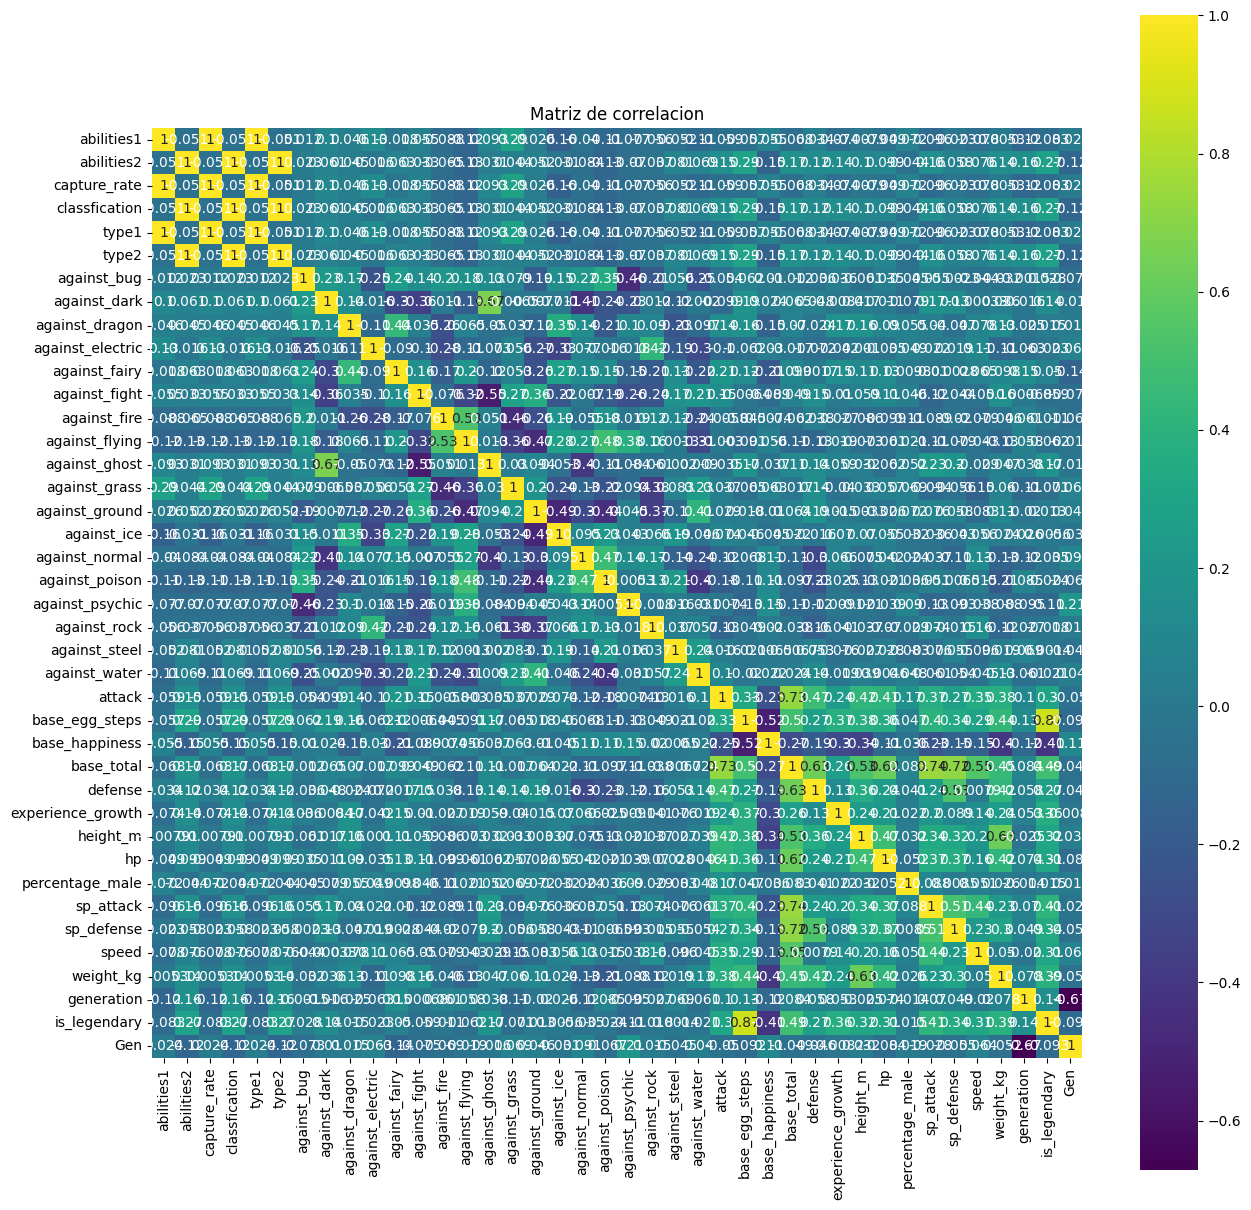

In [ ]:
correlation = df_corr.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap="viridis")
plt.title("Matriz de correlacion", frontsize = 18)
plt.show

In [ ]:
df_corr["Gen"]=df_corr["Gen"].astype(int)

In [ ]:
revelation_features=correlation[correlation>.20]

In [ ]:
revelation_features

,abilities1,abilities2,capture_rate,classfication,type1,type2,against_bug,against_dark,against_dragon,against_electric,...,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,Gen
abilities1,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abilities2,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.271053,NaN
capture_rate,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classfication,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.271053,NaN
type1,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type2,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.271053,NaN
against_bug,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.230107,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
against_dark,NaN,NaN,NaN,NaN,NaN,NaN,0.230107,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
against_dragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
against_electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cor_target=abs(correlation["Gen"])

In [ ]:
cor_target

abilities1           0.023917
abilities2           0.118857
capture_rate         0.023917
classfication        0.118857
type1                0.023917
type2                0.118857
against_bug          0.073181
against_dark         0.010027
against_dragon       0.015495
against_electric     0.062568
against_fairy        0.140167
against_fight        0.075243
against_fire         0.069034
against_flying       0.019156
against_ghost        0.015664
against_grass        0.069284
against_ground       0.046263
against_ice          0.031206
against_normal       0.090745
against_poison       0.067014
against_psychic      0.207683
against_rock         0.014674
against_steel        0.044719
against_water        0.040477
attack               0.049908
base_egg_steps       0.092456
base_happiness       0.107611
base_total           0.049058
defense              0.045914
experience_growth    0.008171
height_m             0.031652
hp                   0.083740
percentage_male      0.019185
sp_attack 

# Selecion De Variables

In [ ]:
# Como no hay valores tan correlacionados usaremos todos par ael modelo

## Modelo de regresion logistica

In [ ]:
df_features=df_c

In [ ]:
array=df_features.values
x_class = array[ : , 0:39]
y_class = array[ : , 39]
X_trainlg, X_testlg, y_trainlg, y_testlg = train_test_split(x_class, y_class, test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
test_size= 0.3
seed = 7
model = LogisticRegression(solver="lbfgs", max_iter=1000)
model.fit(X_trainlg, y_trainlg)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_testlg)
accuracy = model.score(X_testlg, y_testlg)
print('Exactitud del modelo: {:.2f}%'.format(accuracy*100))

Exactitud del modelo: 98.76%


# Carga de modulos para Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


## Uso de datos para modelado

In [ ]:
modelnb = GaussianNB()

In [ ]:
X_trainnb, X_testnb, y_trainnb, y_testnb = train_test_split(x_class, y_class, test_size=0.2,random_state=0)

In [ ]:
modelnb.fit(X_trainnb, y_trainnb)

GaussianNB()

In [ ]:
y_pred = modelnb.predict(X_testnb)

In [ ]:
accuracy = accuracy_score(y_testnb, y_pred)


In [ ]:
print("Precisión: {:.2f}%".format(accuracy*100))

Precisión: 98.14%


# Arboles de decicion

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_class, y_class, test_size=0.1,random_state=7)

In [ ]:
depth = 5
tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth=depth)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
subset = np.unique(tree.tree_.feature[tree.tree_.feature >=0])
print(f'variables: {x_class.shape[1]}')
print(f'variables utilizadas: {subset}')
print(f'Trainning: {tree.score(X_train, y_train).round(2)}')
print(f'Test: {tree.score(X_test, y_test).round(2)}')

variables: 39
variables utilizadas: [37]
Trainning: 1.0
Test: 1.0


# Conclusiones

**Interpretaci ́on de resultados**

Todos los modelos tienen un buen ajuste que indica que se ajusta excelente los datos de prueba con los datos de entrenamiento.

esto es bueno a simple vista pero loq eu mas probablemente indica es sobre ajuste es decir que ha aprendido muhco d elos datos de entrenamiento y que ya no puede aprender mas.

Lo que nos indica el modelo y desde la correlacion es que la mejor variable es la misma generacion.

Tambien Tenemos otras variables que nos muestras datos como las habilidades2:

lo que puede significar que la segunda abilidad de los pokemones de la primera generacion se repetian mucho y no tenian tanta diferencia con otros pokemon.

Tambien classificacion:

que nos podia describir que en generacion uno pues no exixtia tanta diferencia de cambio etc por ejemplo bulbasaur, charmander, squirtle etc tienen la misma descripcion con sus evoluciones.

type2:
podria significar que los pokemons de la primera generacion no tienen segundo typo etc o no cmabia al evolucionar.

against_psychic

against_fairy

Como buen fan de pokemon de las primeras generaciones antiguas pues esto me abrio la mente ya que los tipo hada y tipo psíquico en los primeros juegos de pokemon rojo y verde pues los tipo hada y los psíquicos estaban muy fuertes(desvalanceados)

**Conclusiones**

Los modelos No nos ayudan mucho se podria decir que no existe coincidencias que nos digan la generacion de un pokemon se puede decir que esta bien hecha la generacion de estos.

***El punto 9 no supe***

# hola

In [ ]:
y_pred = model.predict(dfp_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
df

,abilities1,abilities2,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,prediccion
0,Overgrow,Chlorophyll,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1,65,65,45,grass,poison,6.9,1,0,1.0
1,Overgrow,Chlorophyll,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,2,80,80,60,grass,poison,13.0,1,0,1.0
2,Overgrow,Chlorophyll,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,3,122,120,80,grass,poison,100.0,1,0,1.0
3,Blaze,Solar Power,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,4,60,50,65,fire,no,8.5,1,0,1.0
4,Blaze,Solar Power,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,5,80,65,80,fire,no,19.0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Beast Boost,no,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,...,797,107,101,61,steel,flying,999.9,7,1,0.0
797,Beast Boost,no,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,...,798,59,31,109,grass,steel,0.1,7,1,0.0
798,Beast Boost,no,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,...,799,97,53,43,dark,dragon,888.0,7,1,0.0
799,Prism Armor,no,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,800,127,89,79,psychic,no,230.0,7,1,0.0


In [ ]:
df['prediccion'] = y_pred


In [ ]:
df.to_csv('pokemon_pred.csv', index=False)